In [21]:
import numpy as np    
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
sns.set(context="notebook",palette="Spectral",style='darkgrid',color_codes=True)
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics,model_selection
import scipy.stats as stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from scipy.stats import zscore
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE # For data imbalance
from sklearn.model_selection import cross_val_score  # for cross validation

In [25]:
df=pd.read_excel('C:\\Users\\Divya\\OneDrive\\Desktop\\Machine Learning Project\\Election_Data.xlsx')

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [283]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [284]:
df.shape

(1525, 10)

In [285]:
df.dtypes

Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [287]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [32]:
dups=df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
df[dups]

Total no of duplicate values = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [27]:
# Dropping the duplicates

df.drop_duplicates(inplace=True)

In [28]:
# Checking for size of dataset after dropping duplicates

df.shape

(1525, 10)

In [29]:
# Copying the dataset

df_copy=df.copy()

In [30]:
# drop the serial no column 

df = df.drop('Unnamed: 0', axis=1)

The variable 'Unnamed:0' has no significance or impact on target variable 'vote'. Hence dropped the column 'Unnamed:0'.

In [31]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525,NaN,NaN,NaN,54.1823,15.7112,24,41,53,67,93
economic.cond.national,1525,NaN,NaN,NaN,3.2459,0.880969,1,3,3,4,5
economic.cond.household,1525,NaN,NaN,NaN,3.14033,0.929951,1,3,3,4,5
Blair,1525,NaN,NaN,NaN,3.33443,1.17482,1,2,4,4,5
Hague,1525,NaN,NaN,NaN,2.74689,1.2307,1,2,2,4,5
Europe,1525,NaN,NaN,NaN,6.72852,3.29754,1,4,6,10,11
political.knowledge,1525,NaN,NaN,NaN,1.5423,1.08331,0,0,2,2,3
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* There are total 1525 rows and 9 columns in the dataset. 
* There are 8 duplicate records in the dataset. Since they do not add any significance to the dataset, dropped the duplicates.
* There are no null values in the dataset.
* Out of 9 variables, 'Gender' and 'Vote' variables are of object datatype. All other variables are of int64 datatype.
* There are 2 unique values in target variable 'vote'. From the dataset, it appears that Labour party has received more votes with frequency of 1057 out of 1517.
* There are 2 unique values in gender variable with females being the top with frequency of 808 out of 1517. It means more number of females participated in survey than males.
* The average age of voters participated in survey is 54. The minimum and maximum age of voters participated is 24 and 93 respectively.
* The average rating given by voters on 'economic.cond.national' and 'economic.cond.household' is 3. 
* The average rating given by voters on the assessment of 'Labour' party leader 'Blair' is 3.33. Where as, the average rating given to Conservative party leader 'Hague' is 2.75.
* The average rating of both political parties knowledge on Europe integration is 1.5.

In [33]:
# Renaming the columns in a proper way

df.rename(columns={'vote':'Vote','age':'Age','economic.cond.national':'Economic_condition_national','economic.cond.household':'Economic_condition_Household','political.knowledge':'Political_knowledge','gender':'Gender'},inplace=True)

In [34]:
df.columns

Index(['Vote', 'Age', 'Economic_condition_national',
       'Economic_condition_Household', 'Blair', 'Hague', 'Europe',
       'Political_knowledge', 'Gender'],
      dtype='object')

In [13]:
df.Vote.value_counts(1)

Labour          0.697049
Conservative    0.302951
Name: Vote, dtype: float64

From the above output, we can infer that 69% of the voters have chosen Labour party.

In [14]:
df.Blair.value_counts(1)

4    0.548197
2    0.287213
5    0.100328
1    0.063607
3    0.000656
Name: Blair, dtype: float64

From the above output, we can infer that majority of the voters have given rating 4 to Blair.

In [15]:
df.Hague.value_counts(1)

2    0.409180
4    0.365902
1    0.152787
5    0.047869
3    0.024262
Name: Hague, dtype: float64

From the above output, we can infer that majority of the voters have given rating 2 to Hague.

In [16]:
df.Political_knowledge.value_counts(1)

2    0.512787
0    0.298361
3    0.163934
1    0.024918
Name: Political_knowledge, dtype: float64

From the above output, we can infer that majority of voters have given rating 2 on the knowledge of the political parties position on european integration.

In [17]:
df.Economic_condition_national.value_counts(1)

3    0.398033
4    0.355410
2    0.168525
5    0.053770
1    0.024262
Name: Economic_condition_national, dtype: float64

From the above output, we can infer that majority of voters have given rating 3 on assessment of current national economic conditions. It means majority of voters gave average rating.

In [58]:
df.Economic_condition_Household.value_counts(1)

3    0.425181
4    0.286750
2    0.184575
5    0.060646
1    0.042848
Name: Economic_condition_Household, dtype: float64

From the above output, we can infer that majority of voters have given rating 3 on assessment of current household economic conditions. It means majority of voters gave average rating.

In [22]:
# Let's check the skewness values quantitatively

df.skew().sort_values(ascending=True)

Blair                          -0.539514
Political_knowledge            -0.422928
Economic_condition_national    -0.238474
Economic_condition_Household   -0.144148
Europe                         -0.141891
Age                             0.139800
Hague                           0.146191
dtype: float64

# Univariate Analysis:

# Age

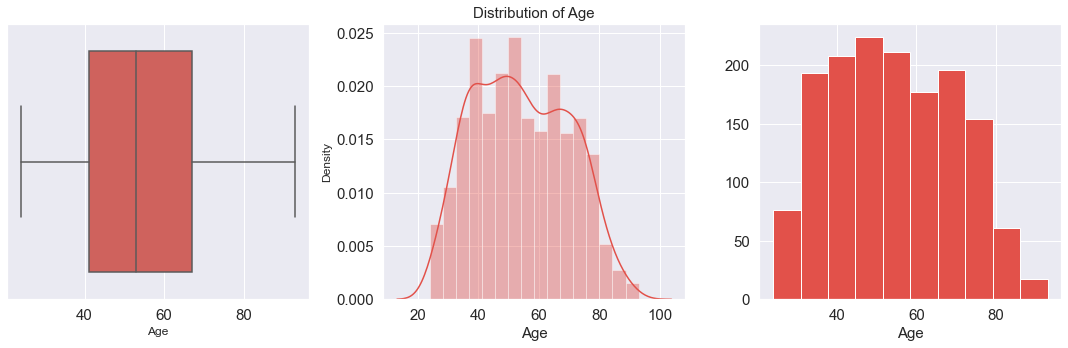

In [24]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='Age',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['Age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_title('Distribution of Age', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The variable 'Age' is positively skewed at 0.139800. There are no outliers in the variable. The distribution of age ranges from 24 to 93.

# Economic_condition_national

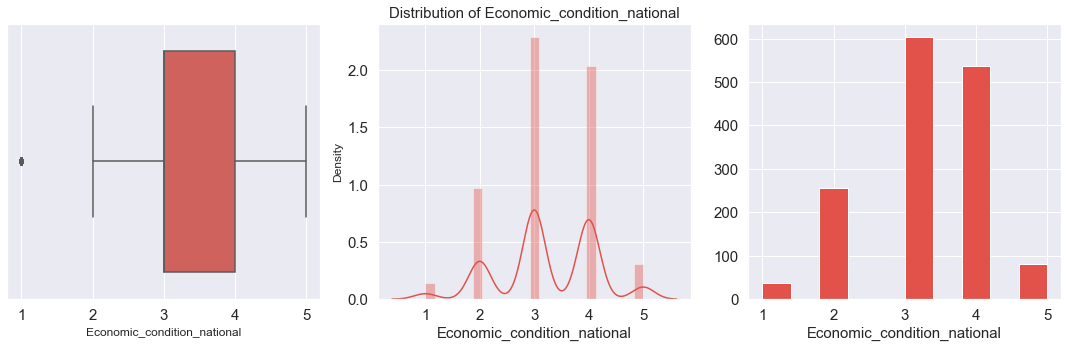

In [25]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='Economic_condition_national',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['Economic_condition_national'],ax=ax2)
ax2.set_xlabel('Economic_condition_national', fontsize=15)
ax2.set_title('Distribution of Economic_condition_national', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Economic_condition_national'])
ax3.set_xlabel('Economic_condition_national', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The variable 'Economic_condition_national' is negatively skewed at -0.238474. There is one outlier in the variable. The distribution of Economic_condition_national ranges from 1 to 5.

# Economic_condition_Household

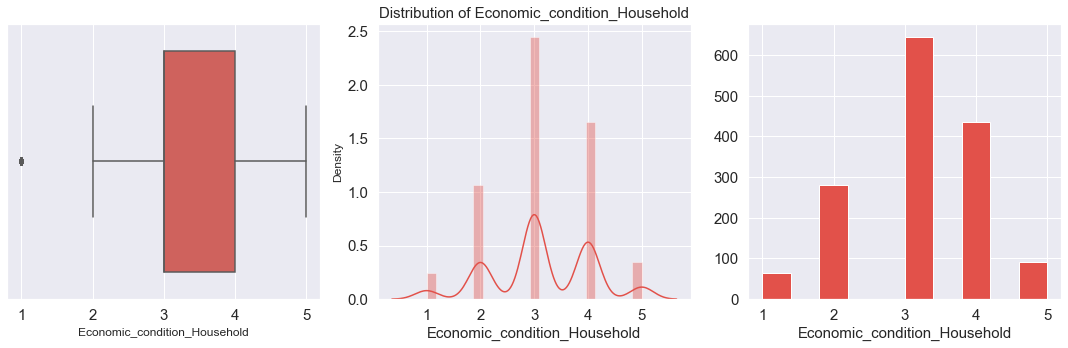

In [27]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='Economic_condition_Household',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['Economic_condition_Household'],ax=ax2)
ax2.set_xlabel('Economic_condition_Household', fontsize=15)
ax2.set_title('Distribution of Economic_condition_Household', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Economic_condition_Household'])
ax3.set_xlabel('Economic_condition_Household', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The variable 'Economic_condition_Household' is negatively skewed at -0.144148. There is one outlier in the variable. The distribution of Economic_condition_Household ranges from 1 to 5.

# Europe

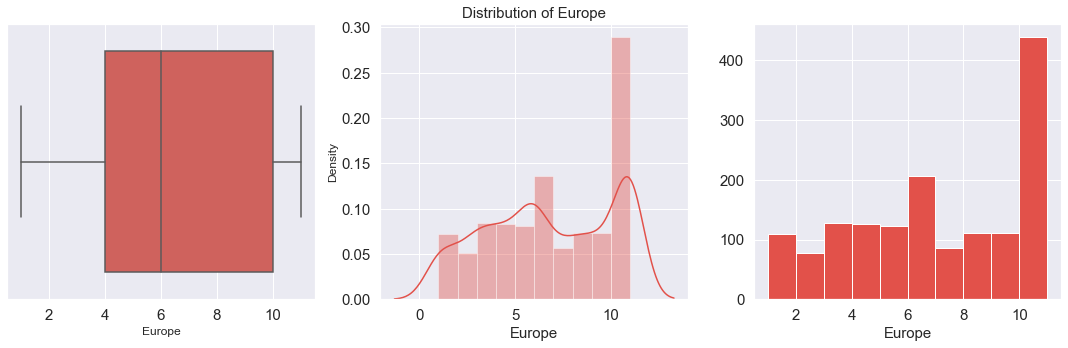

In [28]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='Europe',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['Europe'],ax=ax2)
ax2.set_xlabel('Europe', fontsize=15)
ax2.set_title('Distribution of Europe', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Europe'])
ax3.set_xlabel('Europe', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The variable 'Europe' is negatively skewed at -0.141891. There are no outliers in the variable. The distribution of Europe ranges from 1 to 11.

# Political_knowledge

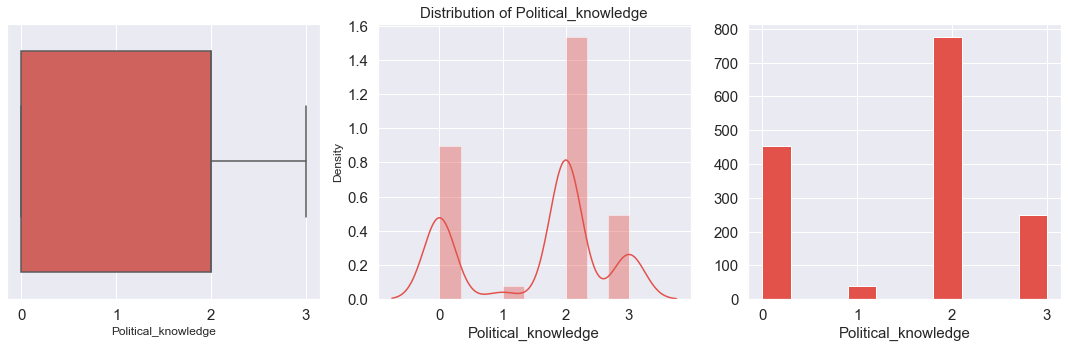

In [29]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='Political_knowledge',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['Political_knowledge'],ax=ax2)
ax2.set_xlabel('Political_knowledge', fontsize=15)
ax2.set_title('Distribution of Political_knowledge', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Political_knowledge'])
ax3.set_xlabel('Political_knowledge', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The variable 'Political_knowledge' is negatively skewed at -0.422928. There are no outliers in the variable. The distribution of Political_knowledge ranges from 0 to 3.

# Blair

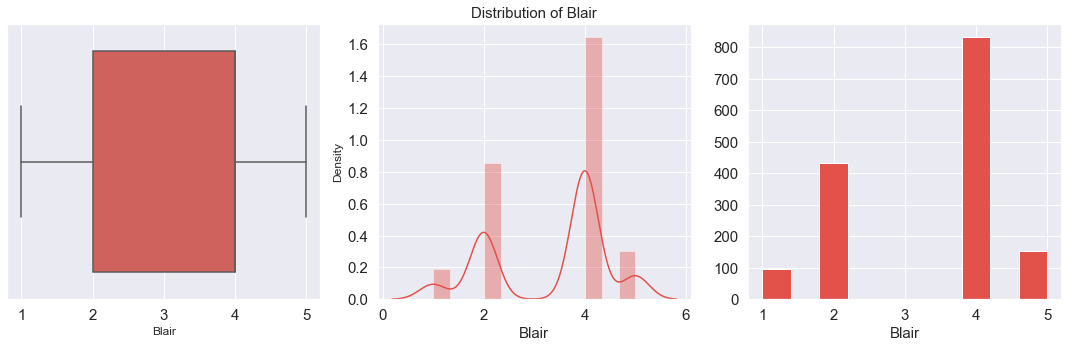

In [30]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='Blair',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['Blair'],ax=ax2)
ax2.set_xlabel('Blair', fontsize=15)
ax2.set_title('Distribution of Blair', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Blair'])
ax3.set_xlabel('Blair', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The variable 'Blair' is negatively skewed at -0.539514. There are no outliers in the variable. The distribution of Blair ranges from 1 to 5.

# Hague

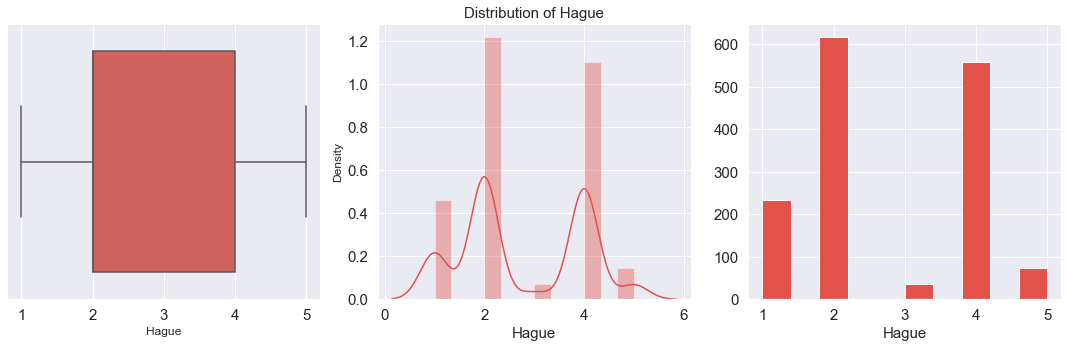

In [31]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='Hague',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['Hague'],ax=ax2)
ax2.set_xlabel('Hague', fontsize=15)
ax2.set_title('Distribution of Hague', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Hague'])
ax3.set_xlabel('Hague', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The variable 'Hague' is positively skewed at 0.146191. There are no outliers in the variable. The distribution of Hague ranges from 1 to 5.

# Categorical variables:

# Gender

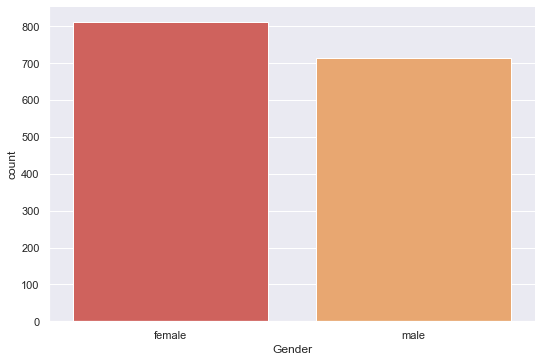

In [18]:
sns.catplot('Gender', data=df, kind='count', aspect=1.5)

# Vote

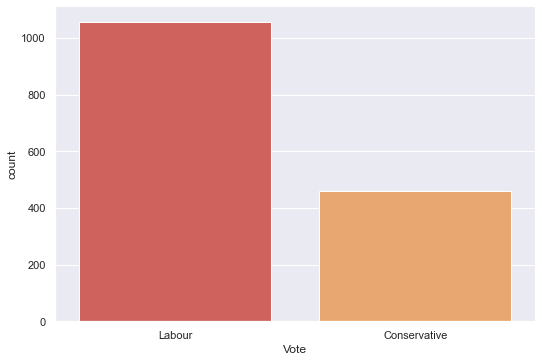

In [40]:
sns.catplot('Vote', data=df, kind='count',aspect=1.5)

# Bivariate Analysis:

<AxesSubplot:xlabel='Vote', ylabel='Age'>

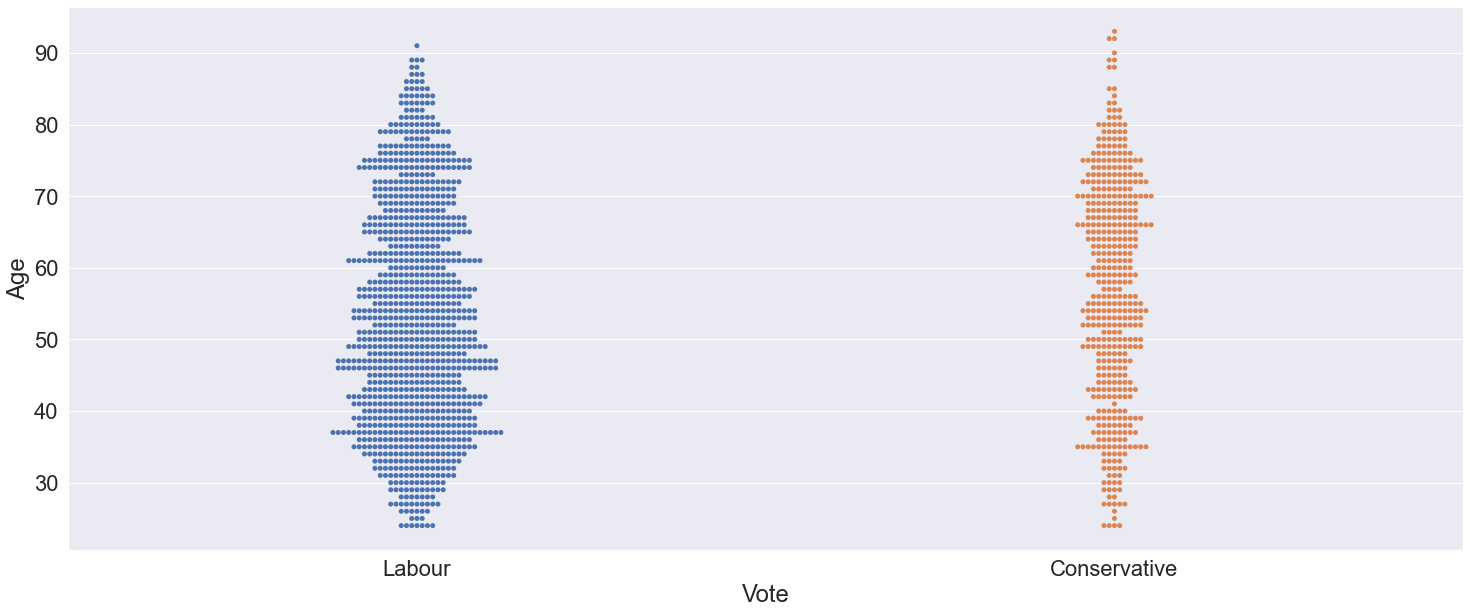

In [41]:
plt.figure(figsize=(25,10))
sns.set(font_scale=2)
sns.swarmplot(data=df,x='Vote', y='Age')

From the above plot, we can see that, voters above 80 years were more in favour of Labour party compared to Conservative.

<AxesSubplot:xlabel='Europe', ylabel='count'>

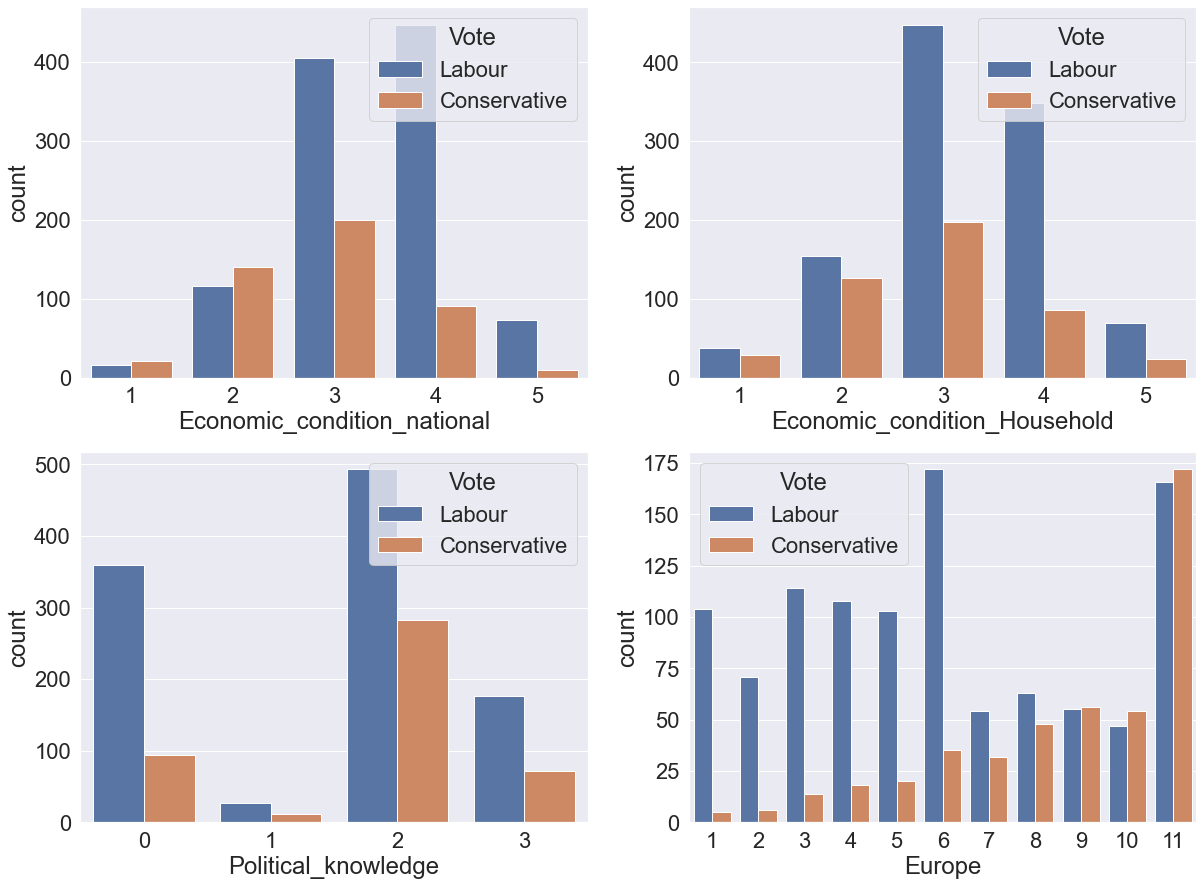

In [49]:
### Count plot

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(data=df,hue='Vote', x='Economic_condition_national')
plt.subplot(2,2,2)
sns.countplot(data=df,hue='Vote', x='Economic_condition_Household')
plt.subplot(2,2,3)
sns.countplot(data=df,hue='Vote', x='Political_knowledge')
plt.subplot(2,2,4)
sns.countplot(data=df,hue='Vote', x='Europe')

* From the above graphs, we infer that majority of the voters gave rating 3 for the variable 'Economic_condition_national'. The voters who gave rating 3 and above voted for Labour party.
* Majority of the voters gave rating 3 for the variable 'Economic_condition_Household'.
* Majority of voters who gave rating 11(meaning Eurosceptic) for variable 'Europe' voted for conservative party. It means majority of the voters who oppose European integration have voted for conservative party.

# Multivariate Analysis:

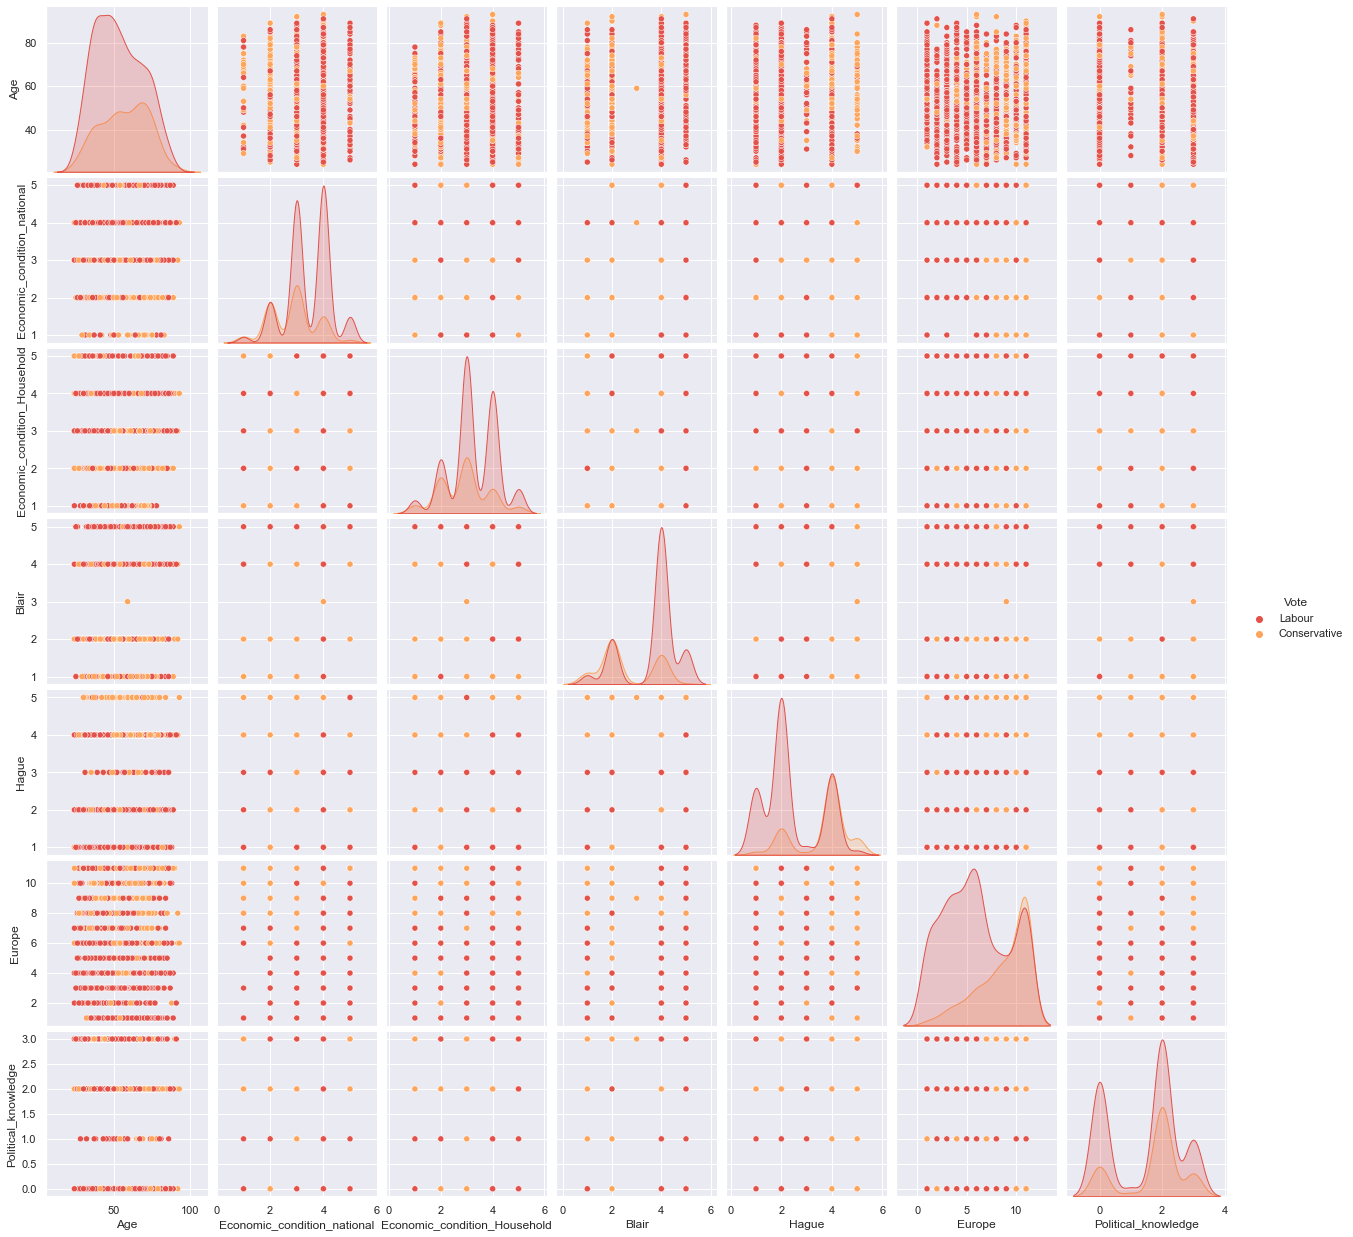

In [65]:
sns.pairplot(df, hue='Vote', diag_kind = 'kde')

In [60]:
corr = df.corr()
round(corr,2)

,Age,Economic_condition_national,Economic_condition_Household,Blair,Hague,Europe,Political_knowledge
Age,1.00,0.02,-0.04,0.03,0.03,0.06,-0.05
Economic_condition_national,0.02,1.00,0.35,0.33,-0.20,-0.21,-0.02
Economic_condition_Household,-0.04,0.35,1.00,0.22,-0.10,-0.11,-0.04
Blair,0.03,0.33,0.22,1.00,-0.24,-0.30,-0.02
Hague,0.03,-0.20,-0.10,-0.24,1.00,0.29,-0.03
Europe,0.06,-0.21,-0.11,-0.30,0.29,1.00,-0.15
Political_knowledge,-0.05,-0.02,-0.04,-0.02,-0.03,-0.15,1.00


<AxesSubplot:>

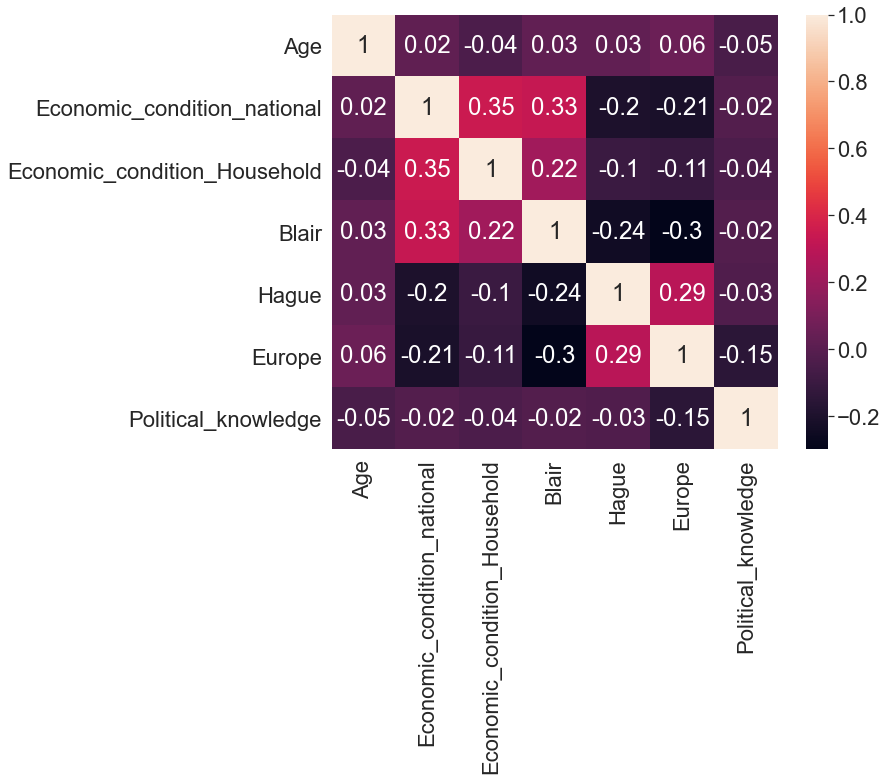

In [61]:
fig_dims = (10, 8)
fig = plt.subplots(figsize=fig_dims)
sns.heatmap(round(corr,2), annot=True)

There is no correlation among the variables.

# Checking for Multicollinearity:

In [304]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [305]:
def checkvif(X):
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print (vif)

In [306]:
X = df[['Economic_condition_national','Age','Economic_condition_Household','Blair','Hague','Europe','Political_knowledge']]
checkvif(X)

                      Variables        VIF
0   Economic_condition_national  15.916883
1                           Age  10.709764
2  Economic_condition_Household  12.904416
3                         Blair   9.882092
4                         Hague   5.937350
5                        Europe   5.338463
6           Political_knowledge   2.825043


The vif is more than 10 for variables 'Economic_condition_national', 'Economic_condition_Household', 'Age'. Hence there is multicollinearity in the dataset.

# Checking for outliers:

In [35]:
df_num=df[['Age','Economic_condition_national','Economic_condition_Household','Blair','Hague','Europe','Political_knowledge']]

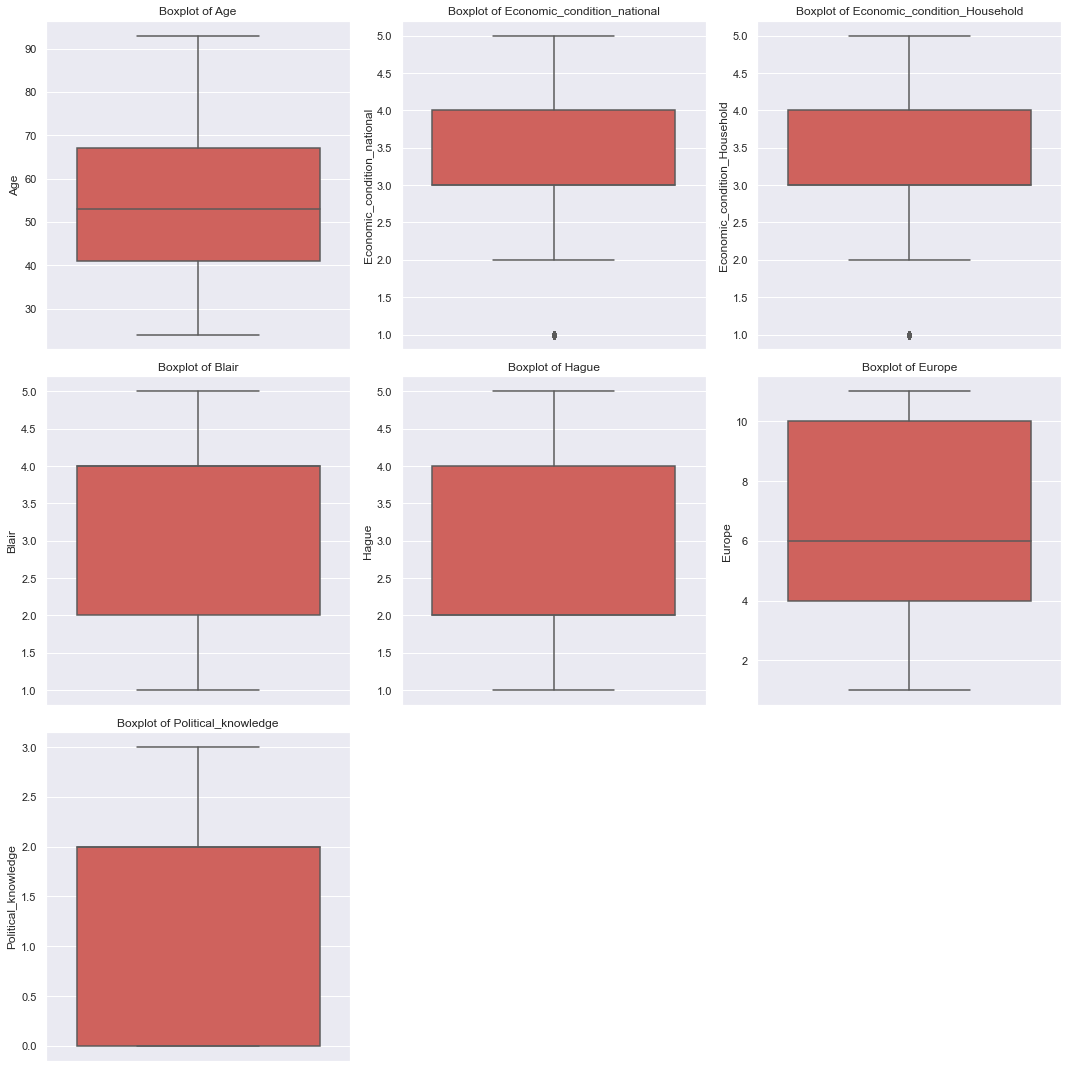

In [308]:
plt.figure(figsize = (15,15))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

There are very few outliers in the variables 'Economic_condition_national' and 'Economic_condition_Household'. Since they are ordinal variables, not treating outliers here.

# Data Encoding:

In [36]:
df=pd.get_dummies(df, columns=['Gender','Vote'],drop_first=True)

In [37]:
df.head()

,Age,Economic_condition_national,Economic_condition_Household,Blair,Hague,Europe,Political_knowledge,Gender_male,Vote_Labour
0,43,3,3,4,1,2,2,0,1
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,0,1
4,41,2,2,1,1,6,2,1,1


In [311]:
df.dtypes

Age                             int64
Economic_condition_national     int64
Economic_condition_Household    int64
Blair                           int64
Hague                           int64
Europe                          int64
Political_knowledge             int64
Gender_male                     uint8
Vote_Labour                     uint8
dtype: object

In [38]:
df.rename(columns={'Gender_male':'Gender','Vote_Labour':'Vote'},inplace=True)

In [39]:
df.columns

Index(['Age', 'Economic_condition_national', 'Economic_condition_Household',
       'Blair', 'Hague', 'Europe', 'Political_knowledge', 'Gender', 'Vote'],
      dtype='object')

In [40]:
# Creating another copy of dataset here

df_copy2=df.copy()

Scaling is required for distance based algorithms like KNN. But Naive Bayes, Linear Discriminant Analysis, and Tree-Based models are not affected by feature scaling. Hence, scaling would be performed before fitting data to KNN model. 

# Train-Test Split:

In [41]:
# Copy all the predictor variables into X dataframe

X = df.drop('Vote', axis=1)

# Copy target into the y dataframe.This is the dependent variable
Y = df[['Vote']]

X.head()

,Age,Economic_condition_national,Economic_condition_Household,Blair,Hague,Europe,Political_knowledge,Gender
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [42]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1,stratify=Y)

In [43]:
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)
print (df.shape)

(1067, 8)
(458, 8)
(1067, 1)
(458, 1)
(1525, 9)


In [44]:
# Lets check the split of the data

print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

69.97% data is in training set
30.03% data is in test set


# Logistic Regression:

In [45]:
# Fit the Logistic Regression model

model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

# Predicting on Training and Test dataset

In [46]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

# Getting the Predicted Classes and Probs

In [47]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.225560,0.774440
1,0.085848,0.914152
2,0.062412,0.937588
3,0.259658,0.740342
4,0.019730,0.980270


# Model Evaluation

In [48]:
# Accuracy - Training Data

LR_acc_train=model.score(X_train, Y_train)
LR_acc_train

0.8284910965323337

In [49]:
# Accuracy - Testing Data

LR_acc_test=model.score(X_test, Y_test)
LR_acc_test

0.8493449781659389

# AUC and ROC for the training data & test data

AUC: 0.876


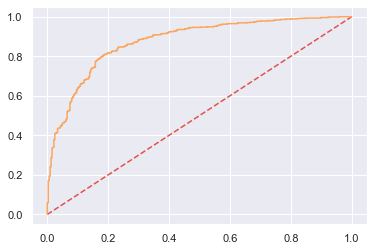

In [227]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LR_auc_train = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % LR_auc_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.915


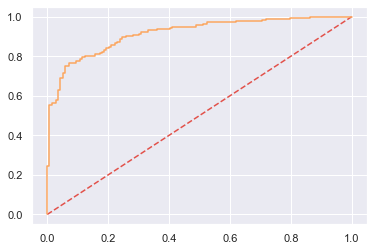

In [228]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LR_auc_test = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % LR_auc_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Confusion Matrix for the training and testing data

In [54]:
confusion_matrix(Y_train, ytrain_predict)

array([[210, 113],
       [ 70, 674]], dtype=int64)

In [55]:
confusion_matrix(Y_test, ytest_predict)

array([[ 94,  45],
       [ 24, 295]], dtype=int64)

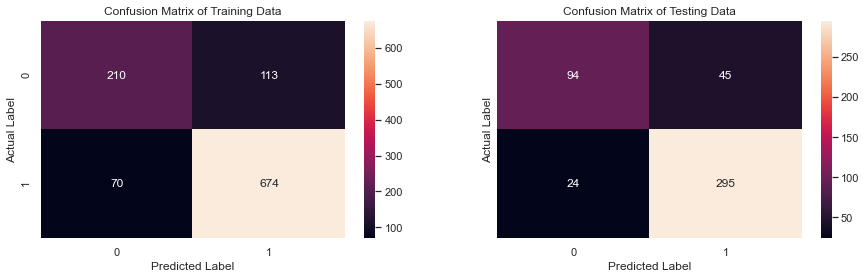

In [56]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,4))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");

# Training Data and Test Data Classification Report

In [57]:
print(classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70       323
           1       0.86      0.91      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.82      0.83      0.82      1067



In [58]:
print(classification_report(Y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.68      0.73       139
           1       0.87      0.92      0.90       319

    accuracy                           0.85       458
   macro avg       0.83      0.80      0.81       458
weighted avg       0.85      0.85      0.85       458



The base logistic regression model with default parameters performed slightly better on test data than training data.

# Applying GridSearchCV for Logistic Regression

In [59]:
grid={'penalty':['l2','none','l1'],
      'solver':['newton-cg','lbfgs','liblinear'],
      'tol':[0.0001,0.00001]}

In [60]:
lr_model = LogisticRegression(max_iter=10000,n_jobs=2)

In [61]:
grid_search = GridSearchCV(estimator =lr_model, param_grid = grid, cv = 5,n_jobs=-1,scoring='f1')

In [62]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none', 'l1'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [63]:
best_model = grid_search.best_estimator_
best_model

LogisticRegression(max_iter=10000, n_jobs=2, penalty='l1', solver='liblinear')

# Predicting on Training and Test dataset

In [64]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

# Getting the Predicted Classes and Probs

In [65]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.233080,0.766920
1,0.088505,0.911495
2,0.061371,0.938629
3,0.261468,0.738532
4,0.019352,0.980648


# Model Evaluation

In [66]:
# Accuracy - Training Data

gridsearch_acc_train=best_model.score(X_train, Y_train)
gridsearch_acc_train

0.8294283036551078

In [67]:
# Accuracy - Testing Data

gridsearch_acc_test=best_model.score(X_test, Y_test)
gridsearch_acc_test

0.8537117903930131

# AUC and ROC for the training data & test data

AUC: 0.877


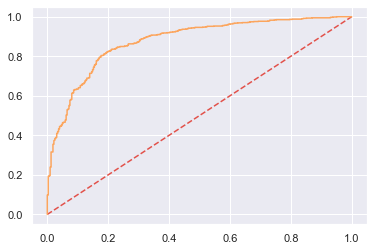

In [229]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gridsearch_auc_train = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % gridsearch_auc_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.915


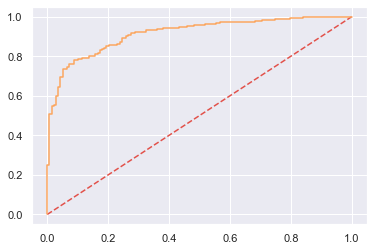

In [230]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gridsearch_auc_test = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % gridsearch_auc_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

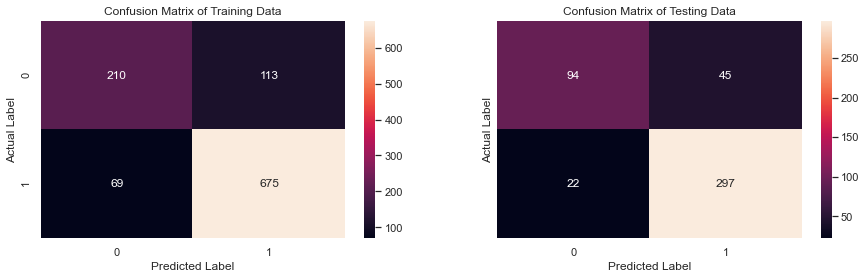

In [70]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,4))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");

# Training Data and Test Data Classification Report

In [71]:
print(classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70       323
           1       0.86      0.91      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.83      0.83      0.83      1067



In [72]:
print(classification_report(Y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       139
           1       0.87      0.93      0.90       319

    accuracy                           0.85       458
   macro avg       0.84      0.80      0.82       458
weighted avg       0.85      0.85      0.85       458



After model tuning and changing the hyper parameters like different solvers, penalty and tolerance level, model performance has slightly improved. The accuracy and auc, roc scores of train and test data are almost similar. It means, the model is neither overfit nor underfit.

In [75]:
## Import the model

import statsmodels.formula.api as sm

In [79]:
df.columns

Index(['Age', 'Economic_condition_national', 'Economic_condition_Household',
       'Blair', 'Hague', 'Europe', 'Political_knowledge', 'Gender', 'Vote'],
      dtype='object')

In [80]:
A1 = 'Vote~Age+Economic_condition_national+Economic_condition_Household+Blair+Hague+Europe+Political_knowledge+Gender'

In [81]:
model_1 = sm.logit(formula =A1, data =df).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.379698
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Vote   No. Observations:                 1525
Model:                          Logit   Df Residuals:                     1516
Method:                           MLE   Df Model:                            8
Date:                Sat, 13 Nov 2021   Pseudo R-squ.:                  0.3809
Time:                        19:21:39   Log-Likelihood:                -579.04
converged:                       True   LL-Null:                       -935.35
Covariance Type:            nonrobust   LLR p-value:                1.373e-148
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        3.0501      0.535      5.701      0.000       2.002       4.099
Age                             -0.0189      0.005     -3.964      0.000      -0.028      -0.010
Economic_condition_national      0.4186      0.094      4.443      0.000       0.234       0.603
Economic_condition_Household     0.0671      0.086      0.781      0.435      -0.101       0.236
Blair                            0.6263      0.066      9.483      0.000       0.497       0.756
Hague                           -0.8397      0.066    -12.682      0.000      -0.970      -0.710
Europe                          -0.2141      0.025     -8.550      0.000      -0.263      -0.165
Political_knowledge             -0.4033      0.071     -5.666      0.000      -0.543      -0.264
Gender                           0.1088      0.151      0.722      0.470      -0.187       0.404
================================================================================================
"""

We can see that the P-Value of 'Gender' and 'Economic_condition_Household' is greater than 0.05. Hence it confirms that variables 'Economic_condition_Household' and 'Gender' attributes have no impact on dependent variable 'Vote'.

In [82]:
A1 = 'Vote~Age+Economic_condition_national+Blair+Hague+Europe+Political_knowledge'

In [83]:
model_1 = sm.logit(formula =A1, data =df).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.380062
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Vote   No. Observations:                 1525
Model:                          Logit   Df Residuals:                     1518
Method:                           MLE   Df Model:                            6
Date:                Sat, 13 Nov 2021   Pseudo R-squ.:                  0.3803
Time:                        19:21:48   Log-Likelihood:                -579.60
converged:                       True   LL-Null:                       -935.35
Covariance Type:            nonrobust   LLR p-value:                2.003e-150
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.2223      0.504      6.394      0.000       2.235       4.210
Age                            -0.0193      0.005     -4.072      0.000      -0.029      -0.010
Economic_condition_national     0.4430      0.090      4.948      0.000       0.268       0.618
Blair                           0.6334      0.066      9.647      0.000       0.505       0.762
Hague                          -0.8399      0.066    -12.697      0.000      -0.970      -0.710
Europe                         -0.2142      0.025     -8.557      0.000      -0.263      -0.165
Political_knowledge            -0.3986      0.071     -5.642      0.000      -0.537      -0.260
===============================================================================================
"""

* Now all P-Values are less than 0.05. Hence all these attributes and their coeffficients have importance in deciding the target variable 'Vote'.

* Also we can see that coefficient value is high for 'Blair' and 'Economic_condition_national'.

In [84]:
model_1.params

Intercept                      3.222328
Age                           -0.019334
Economic_condition_national    0.443003
Blair                          0.633389
Hague                         -0.839946
Europe                        -0.214238
Political_knowledge           -0.398573
dtype: float64

# Logistic Regression Metrics:

In [85]:
lr_metrics_train=classification_report(Y_train, ytrain_predict,output_dict=True)
LR_metrics=pd.DataFrame(lr_metrics_train).transpose()
lr_train_f1=round(LR_metrics.loc["1"][2],2)
lr_train_recall=round(LR_metrics.loc["1"][1],2)
lr_train_precision=round(LR_metrics.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.86
lr_train_recall  0.91
lr_train_f1  0.88


In [86]:
lr_metrics_test=classification_report(Y_test, ytest_predict,output_dict=True)
LR_metrics2=pd.DataFrame(lr_metrics_test).transpose()
lr_test_f1=round(LR_metrics2.loc["1"][2],2)
lr_test_recall=round(LR_metrics2.loc["1"][1],2)
lr_test_precision=round(LR_metrics2.loc["1"][0],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.87
lr_test_recall  0.93
lr_test_f1  0.9


In [356]:
for i,j in np.array(model_1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(3.22) * Intercept + (-0.02) * Age + (0.44) * Economic_condition_national + (0.63) * Blair + (-0.84) * Hague + (-0.21) * Europe + (-0.4) * Political_knowledge + 

# Linear Discriminant Analysis

In [88]:
#Build LDA Model

clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

# Prediction

In [89]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

# Probability prediction for the training and test data

In [90]:
# Training Data Probability Prediction

pred_prob_train = model.predict_proba(X_train)
pd.DataFrame(pred_prob_train).head()

,0,1
0,0.067319,0.932681
1,0.185905,0.814095
2,0.047646,0.952354
3,0.058864,0.941136
4,0.021425,0.978575


In [91]:
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)
pd.DataFrame(pred_prob_test).head()

,0,1
0,0.198203,0.801797
1,0.059044,0.940956
2,0.052430,0.947570
3,0.250223,0.749777
4,0.014292,0.985708


# Model Evaluation

In [92]:
# Accuracy - Training Data

lda_acc_train= model.score(X_train, Y_train)
lda_acc_train

0.8256794751640113

In [93]:
# Accuracy - Testing Data

lda_acc_test= model.score(X_test, Y_test)
lda_acc_test

0.8449781659388647

# AUC and ROC for the training data & test data

AUC for the Training Data: 0.876


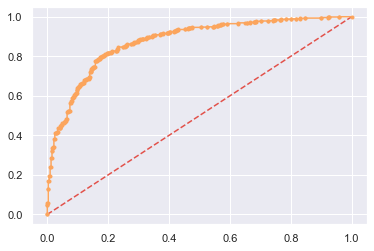

In [231]:
# AUC and ROC for the training data

# calculate AUC
lda_auc_train = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_auc_train)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


AUC for the Test Data: 0.915


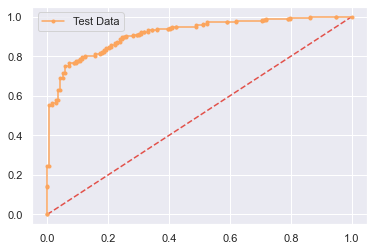

In [232]:
# AUC and ROC for the test data

# calculate AUC
lda_auc_test = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_auc_test)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# Training Data and Test Data Classification Report Comparison

In [96]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.73      0.67      0.70       323
           1       0.86      0.90      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.82      0.83      0.82      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.77      0.70      0.73       139
           1       0.87      0.91      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458
 



# Training Data and Test Data Confusion Matrix Comparison

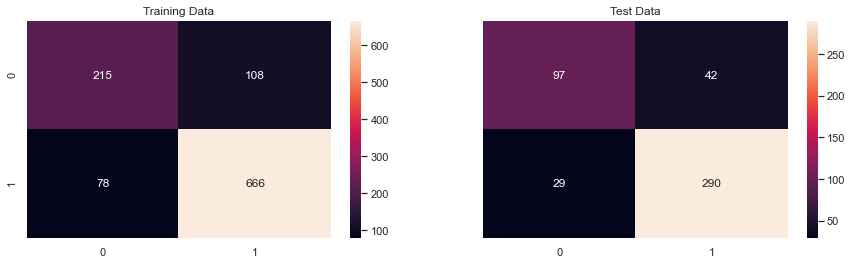

In [97]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,4))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');

# LDA Metrics

In [98]:
lda_metrics_train=classification_report(Y_train, pred_class_train,output_dict=True)
lda_metrics1=pd.DataFrame(lda_metrics_train).transpose()
lda_train_f1=round(lda_metrics1.loc["1"][2],2)
lda_train_recall=round(lda_metrics1.loc["1"][1],2)
lda_train_precision=round(lda_metrics1.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lr_train_f1)

lda_train_precision  0.86
lda_train_recall  0.9
lda_train_f1  0.88


In [99]:
lda_metrics_test=classification_report(Y_test,pred_class_test,output_dict=True)
lda_metrics2=pd.DataFrame(lda_metrics_test).transpose()
lda_test_f1=round(lda_metrics2.loc["1"][2],2)
lda_test_recall=round(lda_metrics2.loc["1"][1],2)
lda_test_precision=round(lda_metrics2.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.87
lda_test_recall  0.91
lda_test_f1  0.89


# Model Comparison of LR and LDA:

In [233]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
df_lr_lda = pd.DataFrame({'LR Train':[gridsearch_acc_train,gridsearch_auc_train,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[gridsearch_acc_test,gridsearch_auc_test,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train':[lda_acc_train,lda_auc_train,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_acc_test,lda_auc_test,lda_test_recall,lda_test_precision,lda_test_f1],},index=index)
round(df_lr_lda,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.83,0.85,0.83,0.84
AUC,0.88,0.92,0.88,0.91
Recall,0.91,0.93,0.90,0.91
Precision,0.86,0.87,0.86,0.87
F1 Score,0.88,0.90,0.88,0.89


* Logistic Regression and LDA have relatively similar scores with minimal difference when it comes to training and testing data.

* We can see that both models are giving similar results with not much of difference in accuracy.

* It appears that Logistic regression gives better f1 score and better recall rate as compared to the LDA.

* Among both the models, we go with Logistic Regression as its test data has better accuracy, recall and F1 scores.

# Naive Bayes Model

In [101]:
NB_model = GaussianNB()
NB_model.fit(X_train, Y_train)

GaussianNB()

# Predicting on Training and Test dataset

In [102]:
ytrain_predict = NB_model.predict(X_train)
ytest_predict = NB_model.predict(X_test)

# Getting the Predicted Classes and Probs

In [103]:
## Getting the probabilities on the test set

ytest_predict_prob=NB_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.240951,0.759049
1,0.075278,0.924722
2,0.007475,0.992525
3,0.161693,0.838307
4,0.000622,0.999378


# Model Evaluation

In [104]:
# Accuracy - Training Data

NB_acc_train= NB_model.score(X_train, Y_train)
NB_acc_train

0.8219306466729147

In [105]:
# Accuracy - Testing Data

NB_acc_test= NB_model.score(X_test, Y_test)
NB_acc_test

0.8471615720524017

# AUC and ROC for the training data & test data

AUC: 0.874


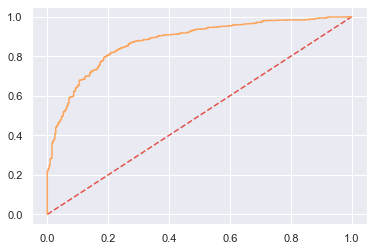

In [234]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_auc_train = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % NB_auc_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.910


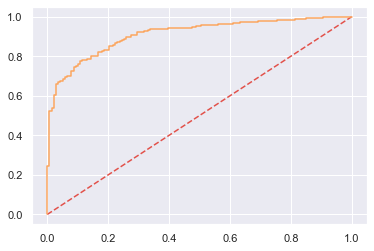

In [235]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_auc_test = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % NB_auc_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Training Data and Test Data Classification Report Comparison

In [108]:
print(classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       323
           1       0.87      0.88      0.87       744

    accuracy                           0.82      1067
   macro avg       0.79      0.78      0.79      1067
weighted avg       0.82      0.82      0.82      1067



In [109]:
print(classification_report(Y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       139
           1       0.88      0.90      0.89       319

    accuracy                           0.85       458
   macro avg       0.82      0.81      0.82       458
weighted avg       0.85      0.85      0.85       458



# Training Data and Test Data Confusion Matrix Comparison

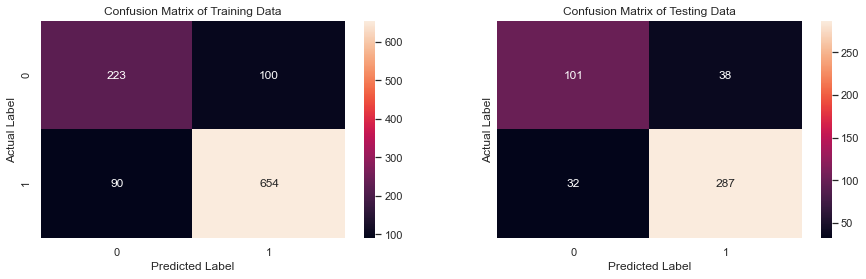

In [110]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,4))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");

# Naive Bayes Metrics

In [111]:
NB_metrics_train=classification_report(Y_train, ytrain_predict,output_dict=True)
NB_metrics=pd.DataFrame(NB_metrics_train).transpose()
NB_train_f1=round(NB_metrics.loc["1"][2],2)
NB_train_recall=round(NB_metrics.loc["1"][1],2)
NB_train_precision=round(NB_metrics.loc["1"][0],2)
print ('NB_train_precision ',NB_train_precision)
print ('NB_train_recall ',NB_train_recall)
print ('NB_train_f1 ',NB_train_f1)

NB_train_precision  0.87
NB_train_recall  0.88
NB_train_f1  0.87


In [112]:
NB_metrics_test=classification_report(Y_test, ytest_predict,output_dict=True)
NB_metrics2=pd.DataFrame(NB_metrics_test).transpose()
NB_test_f1=round(NB_metrics2.loc["1"][2],2)
NB_test_recall=round(NB_metrics2.loc["1"][1],2)
NB_test_precision=round(NB_metrics2.loc["1"][0],2)
print ('NB_test_precision ',NB_test_precision)
print ('NB_test_recall ',NB_test_recall)
print ('NB_test_f1 ',NB_test_f1)

NB_test_precision  0.88
NB_test_recall  0.9
NB_test_f1  0.89


# KNN Model

KNN requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors. Euclidean distance is sensitive to magnitudes. The features with high magnitudes will weight more than features with low magnitudes. Hence we do scaling before fitting the data into KNN model.

In [113]:
# Copy all the predictor variables into X dataframe

x = df_copy2.drop('Vote', axis=1)

# Copy target into the y dataframe.This is the dependent variable
y = df_copy2[['Vote']]

x.head()

,Age,Economic_condition_national,Economic_condition_Household,Blair,Hague,Europe,Political_knowledge,Gender
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [114]:
x_scaled=x.apply(zscore)

In [115]:
x_scaled.head()

,Age,Economic_condition_national,Economic_condition_Household,Blair,Hague,Europe,Political_knowledge,Gender
0,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,-0.937059
1,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,1.067169
2,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,1.067169
3,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059
4,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643,1.067169


In [116]:
# Split X and y into training and test set in 70:30 ratio

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30 , random_state=1,stratify=Y)

In [117]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)
print (df_copy2.shape)

(1067, 8)
(458, 8)
(1067, 1)
(458, 1)
(1525, 9)


In [118]:
# Lets check the split of the data

print("{0:0.2f}% data is in training set".format((len(x_train)/len(df_copy2.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df_copy2.index)) * 100))

69.97% data is in training set
30.03% data is in test set


In [119]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

# Predicting on Training and Test dataset

In [120]:
ytrain_predict = KNN_model.predict(x_train)
ytest_predict = KNN_model.predict(x_test)

# Getting the Predicted Classes and Probs

In [121]:
## Getting the probabilities on the test set

ytest_predict_prob=KNN_model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.2,0.8
1,0.2,0.8
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


# Model Evaluation

In [122]:
# Accuracy - Training Data

KNN_model.score(x_train, y_train)

0.8528584817244611

In [123]:
# Accuracy - Testing Data

KNN_model.score(x_test, y_test)

0.8318777292576419

# Training Data and Test Data Classification Report Comparison

In [124]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       323
           1       0.89      0.90      0.90       744

    accuracy                           0.85      1067
   macro avg       0.83      0.82      0.82      1067
weighted avg       0.85      0.85      0.85      1067



In [125]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72       139
           1       0.87      0.89      0.88       319

    accuracy                           0.83       458
   macro avg       0.80      0.79      0.80       458
weighted avg       0.83      0.83      0.83       458



# Training Data and Test Data Confusion Matrix Comparison

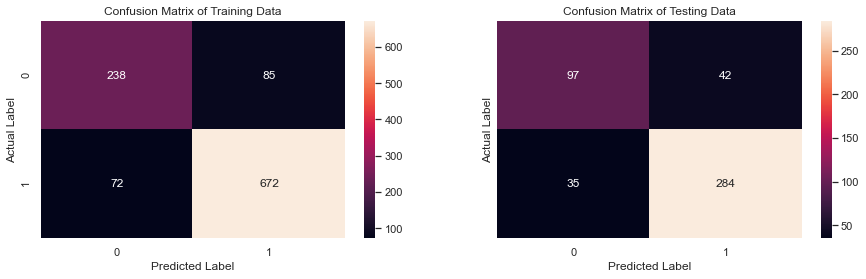

In [126]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,4))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");

Default value n_neighbors=5. Lets run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error

Hint: Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE.

In [127]:
# empty list that will hold accuracy scores

ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    # evaluate test accuracy
    scores = knn.score(x_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.18777292576419213,
 0.15502183406113534,
 0.16812227074235808,
 0.1593886462882096,
 0.16157205240174677,
 0.15283842794759828,
 0.13973799126637554,
 0.14847161572052403,
 0.1506550218340611,
 0.15283842794759828]

# Plot misclassification error vs k (with k value on X-axis) using matplotlib

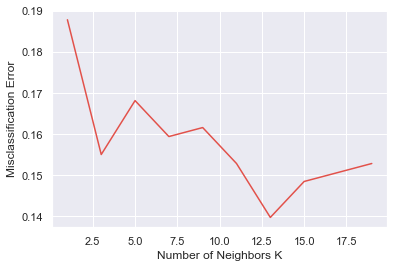

In [128]:
# plot misclassification error vs k

plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

For K = 13, it is giving the best test accuracy lets check train and test for K=13 with other evaluation metrics

In [129]:
KNN_Model=KNeighborsClassifier(n_neighbors=13)
KNN_Model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13)

# Predicting on Training and Test dataset

In [130]:
ytrain_predict1 = KNN_Model.predict(x_train)
ytest_predict1 = KNN_Model.predict(x_test)

# Getting the Predicted Classes and Probs

In [131]:
## Getting the probabilities on the test set

ytest_predict_prob=KNN_Model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.307692,0.692308
1,0.153846,0.846154
2,0.000000,1.000000
3,0.076923,0.923077
4,0.000000,1.000000


# Model Evaluation

In [132]:
# Accuracy - Training Data

KNN_acc_train= KNN_Model.score(x_train, y_train)
KNN_acc_train

0.8425492033739457

In [133]:
# Accuracy - Training Data

KNN_acc_test= KNN_Model.score(x_test, y_test)
KNN_acc_test

0.8602620087336245

# Training Data and Test Data Classification Report Comparison

In [134]:
print(classification_report(y_train, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       323
           1       0.87      0.91      0.89       744

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [135]:
print(classification_report(y_test, ytest_predict1))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       139
           1       0.89      0.92      0.90       319

    accuracy                           0.86       458
   macro avg       0.84      0.82      0.83       458
weighted avg       0.86      0.86      0.86       458



# Training Data and Test Data Confusion Matrix Comparison

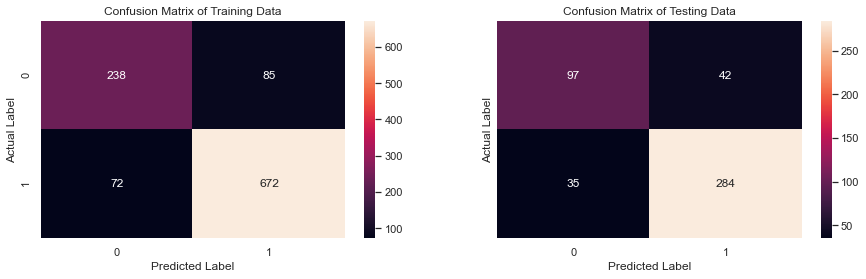

In [136]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,4))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");

In [137]:
0.8602620087336245 - 0.8425492033739457

0.017712805359678785

As the difference between train and test accuracies is less than 10%, it is a valid model.

AUC: 0.911


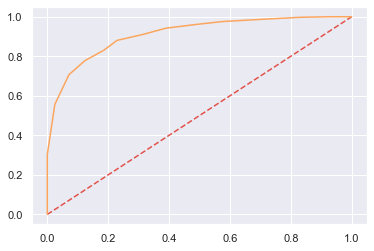

In [236]:
# predict probabilities
probs = KNN_Model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_auc_train = roc_auc_score(y_train, probs)
print('AUC: %.3f' % KNN_auc_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.894


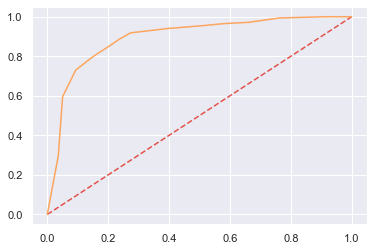

In [237]:
# predict probabilities
probs = KNN_Model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_auc_test = roc_auc_score(y_test, probs)
print('AUC: %.3f' % KNN_auc_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# KNN Metrics

In [140]:
KNN_metrics_train=classification_report(y_train, ytrain_predict1,output_dict=True)
KNN_metrics=pd.DataFrame(KNN_metrics_train).transpose()
KNN_train_f1=round(KNN_metrics.loc["1"][2],2)
KNN_train_recall=round(KNN_metrics.loc["1"][1],2)
KNN_train_precision=round(KNN_metrics.loc["1"][0],2)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

KNN_train_precision  0.87
KNN_train_recall  0.91
KNN_train_f1  0.89


In [141]:
KNN_metrics_test=classification_report(y_test, ytest_predict1,output_dict=True)
KNN_metrics2=pd.DataFrame(KNN_metrics_test).transpose()
KNN_test_f1=round(KNN_metrics2.loc["1"][2],2)
KNN_test_recall=round(KNN_metrics2.loc["1"][1],2)
KNN_test_precision=round(KNN_metrics2.loc["1"][0],2)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_precision  0.89
KNN_test_recall  0.92
KNN_test_f1  0.9


# Model Comparison of Naive Bayes and KNN:

In [238]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
df_NB_KNN = pd.DataFrame({'NB Train':[NB_acc_train,NB_auc_train,NB_train_recall,NB_train_precision,NB_train_f1],
        'NB Test':[NB_acc_test,NB_auc_test,NB_test_recall,NB_test_precision,NB_test_f1],
       'KNN Train':[KNN_acc_train,KNN_auc_train,KNN_train_recall,KNN_train_precision,KNN_train_f1],
        'KNN Test':[KNN_acc_test,KNN_auc_test,KNN_test_recall,KNN_test_precision,KNN_test_f1],},index=index)
round(df_NB_KNN,2)

,NB Train,NB Test,KNN Train,KNN Test
Accuracy,0.82,0.85,0.84,0.86
AUC,0.87,0.91,0.91,0.89
Recall,0.88,0.90,0.91,0.92
Precision,0.87,0.88,0.87,0.89
F1 Score,0.87,0.89,0.89,0.90


* Naive Bayes and KNN have relatively similar scores with minimal difference when it comes to training and testing data.

* We can see that both models are giving similar results with not much of difference in accuracy.

* It appears that KNN gives better f1 score, Accuracy and better recall rate as compared to the Naive Bayes.

* Among both the models, we go with KNN as its test data has better accuracy, recall and F1 scores.

Model tuning has been done on all models above. Grid search, different solvers and c values have been used for logistic regression and different k values have been checked for KNN model.

# Build Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.

In [144]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

In [145]:
print(dTree.score(X_train, Y_train))

0.9990627928772259


In [146]:
print(dTree.score(X_test, Y_test))

0.7729257641921398


In [147]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dTree, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

The above code will save a .dot file in your working directory.
WebGraphviz is Graphviz in the Browser.
Copy paste the contents of the file into the link below to get the visualization
http://webgraphviz.com/

# Regularisation of decision tree

In [148]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 4,random_state=1)
dTreeR.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [149]:
#Accuracy on train data

print(dTreeR.score(X_train, Y_train))

0.8284910965323337


In [150]:
#Accuracy on test data

print(dTreeR.score(X_test, Y_test))

0.8231441048034934


# Generating New Tree

In [151]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

# Feature Importance

In [152]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                   Imp
Hague                         0.476373
Blair                         0.197576
Europe                        0.150938
Political_knowledge           0.142588
Age                           0.023378
Economic_condition_national   0.009148
Economic_condition_Household  0.000000
Gender                        0.000000


It appears that Hague and Blair are 2 most important variables in the dataset followed by Europe and Political knowledge. Variables 'Economic_condition_Household' and 'Gender' have no importance on the target variable.

In [153]:
ytrain_predict = dTreeR.predict(X_train)
ytest_predict = dTreeR.predict(X_test)

In [154]:
## Getting the probabilities on the test set

ytest_predict_prob=dTreeR.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.245614,0.754386
1,0.041096,0.958904
2,0.045685,0.954315
3,0.070175,0.929825
4,0.045685,0.954315


In [155]:
print(classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       323
           1       0.87      0.89      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.79      0.79      1067
weighted avg       0.83      0.83      0.83      1067



In [156]:
print(classification_report(Y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       139
           1       0.86      0.89      0.87       319

    accuracy                           0.82       458
   macro avg       0.79      0.78      0.79       458
weighted avg       0.82      0.82      0.82       458



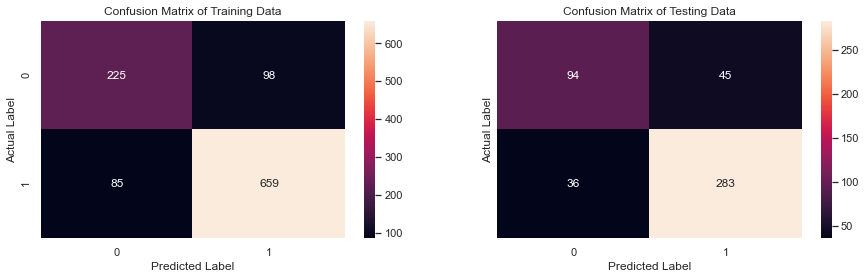

In [157]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,4))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");

# AUC and ROC for the training data & test data

AUC: 0.886


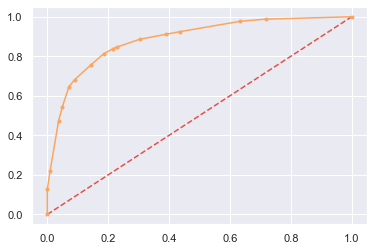

In [239]:
# predict probabilities
probs = dTreeR.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
dTree_auc_train = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % dTree_auc_train)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.872


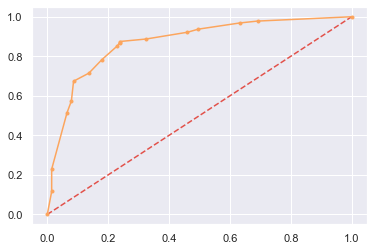

In [240]:
# predict probabilities
probs = dTreeR.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
dTree_auc_test = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % dTree_auc_test)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Bagging

In [178]:
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=150,random_state=1)
#bgcl = BaggingClassifier(n_estimators=150,random_state=1)

bgcl = bgcl.fit(X_train, Y_train)

In [179]:
ytrain_predict = bgcl.predict(X_train)
ytest_predict = bgcl.predict(X_test)

In [180]:
## Getting the probabilities on the test set

ytest_predict_prob=bgcl.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.040000,0.960000
1,0.253333,0.746667
2,0.160000,0.840000
3,0.200000,0.800000
4,0.026667,0.973333


# Model Evaluation

In [181]:
# Accuracy - Training Data

bgcl_acc_train= bgcl.score(X_train, Y_train)
bgcl_acc_train

0.9990627928772259

In [182]:
# Accuracy - Testing Data

bgcl_acc_test= bgcl.score(X_test, Y_test)
bgcl_acc_test

0.8253275109170306

# Training Data and Test Data Classification Report Comparison

In [165]:
print(classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00       744

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [166]:
print(classification_report(Y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       139
           1       0.86      0.90      0.88       319

    accuracy                           0.83       458
   macro avg       0.80      0.78      0.79       458
weighted avg       0.82      0.83      0.82       458



# Training Data and Test Data Confusion Matrix Comparison

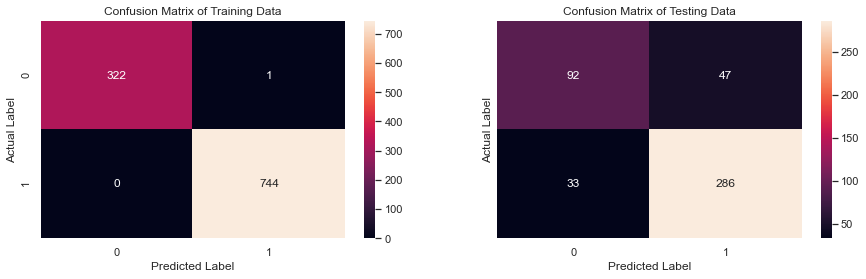

In [167]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,4))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");

# AUC and ROC for the training data & test data

AUC: 1.000


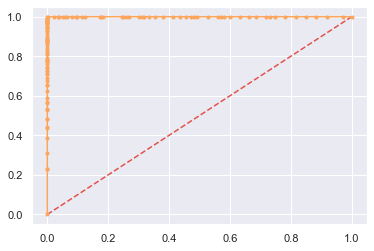

In [225]:
# predict probabilities
probs = bgcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
bgcl_auc_train = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % bgcl_auc_train)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.894


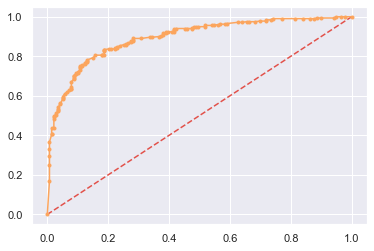

In [226]:
# predict probabilities
probs = bgcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
bgcl_auc_test = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % bgcl_auc_test)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Bagging Metrics

In [171]:
bgcl_metrics_train=classification_report(Y_train, ytrain_predict,output_dict=True)
bgcl_metrics=pd.DataFrame(bgcl_metrics_train).transpose()
bgcl_train_f1=round(bgcl_metrics.loc["1"][2],2)
bgcl_train_recall=round(bgcl_metrics.loc["1"][1],2)
bgcl_train_precision=round(bgcl_metrics.loc["1"][0],2)
print ('bgcl_train_precision ',bgcl_train_precision)
print ('bgcl_train_recall ',bgcl_train_recall)
print ('bgcl_train_f1 ',bgcl_train_f1)

bgcl_train_precision  1.0
bgcl_train_recall  1.0
bgcl_train_f1  1.0


In [172]:
bgcl_metrics_test=classification_report(Y_test, ytest_predict,output_dict=True)
bgcl_metrics2=pd.DataFrame(bgcl_metrics_test).transpose()
bgcl_test_f1=round(bgcl_metrics2.loc["1"][2],2)
bgcl_test_recall=round(bgcl_metrics2.loc["1"][1],2)
bgcl_test_precision=round(bgcl_metrics2.loc["1"][0],2)
print ('bgcl_test_precision ',bgcl_test_precision)
print ('bgcl_test_recall ',bgcl_test_recall)
print ('bgcl_test_f1 ',bgcl_test_f1)

bgcl_test_precision  0.86
bgcl_test_recall  0.9
bgcl_test_f1  0.88


# Random Forest

In [183]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

In [184]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 7, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100, 150],
    'min_samples_split': [100, 200, 300],
    'n_estimators': [100, 300]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [185]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 100, 150],
                         'min_samples_split': [100, 200, 300],
                         'n_estimators': [100, 300]})

In [446]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 300}

In [186]:
best_grid = grid_search.best_estimator_

# Predicting on Training and Test dataset

In [187]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

# Getting the Predicted Classes and Probs

In [188]:
ytest_predict_prob=best_grid.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.412742,0.587258
1,0.179214,0.820786
2,0.070148,0.929852
3,0.312221,0.687779
4,0.034059,0.965941


# Model Evaluation

In [191]:
# Accuracy - Training Data

rfcl_acc_train= best_grid.score(X_train, Y_train)
rfcl_acc_train

0.823805060918463

In [192]:
# Accuracy - Testing Data

rfcl_acc_test= best_grid.score(X_test, Y_test)
rfcl_acc_test

0.8296943231441049

# Training Data and Test Data Classification Report Comparison

In [193]:
print(classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.78      0.58      0.66       323
           1       0.83      0.93      0.88       744

    accuracy                           0.82      1067
   macro avg       0.81      0.75      0.77      1067
weighted avg       0.82      0.82      0.82      1067



In [194]:
print(classification_report(Y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.57      0.67       139
           1       0.83      0.94      0.89       319

    accuracy                           0.83       458
   macro avg       0.82      0.76      0.78       458
weighted avg       0.83      0.83      0.82       458



# Training Data and Test Data Confusion Matrix Comparison

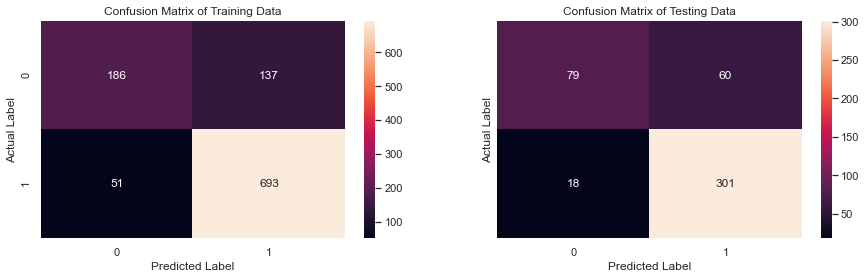

In [195]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,4))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");

# AUC and ROC for the training data & test data

AUC: 0.886


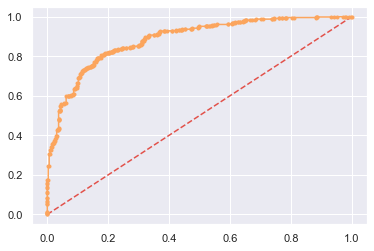

In [241]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
rfcl_auc_train = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % rfcl_auc_train)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.898


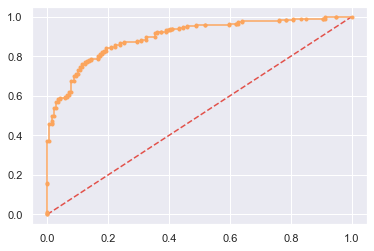

In [242]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
rfcl_auc_test = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % rfcl_auc_test)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Random Forest Metrics

In [198]:
rfcl_metrics_train=classification_report(Y_train, ytrain_predict,output_dict=True)
rfcl_metrics=pd.DataFrame(rfcl_metrics_train).transpose()
rfcl_train_f1=round(rfcl_metrics.loc["1"][2],2)
rfcl_train_recall=round(rfcl_metrics.loc["1"][1],2)
rfcl_train_precision=round(rfcl_metrics.loc["1"][0],2)
print ('rfcl_train_precision ',rfcl_train_precision)
print ('rfcl_train_recall ',rfcl_train_recall)
print ('rfcl_train_f1 ',rfcl_train_f1)

rfcl_train_precision  0.83
rfcl_train_recall  0.93
rfcl_train_f1  0.88


In [199]:
rfcl_metrics_test=classification_report(Y_test, ytest_predict,output_dict=True)
rfcl_metrics2=pd.DataFrame(rfcl_metrics_test).transpose()
rfcl_test_f1=round(rfcl_metrics2.loc["1"][2],2)
rfcl_test_recall=round(rfcl_metrics2.loc["1"][1],2)
rfcl_test_precision=round(rfcl_metrics2.loc["1"][0],2)
print ('rfcl_test_precision ',rfcl_test_precision)
print ('rfcl_test_recall ',rfcl_test_recall)
print ('rfcl_test_f1 ',rfcl_test_f1)

rfcl_test_precision  0.83
rfcl_test_recall  0.94
rfcl_test_f1  0.89


# ADA Boosting

In [200]:
Ada_model = AdaBoostClassifier(n_estimators=100,random_state=1)
Ada_model.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

# Predicting on Training and Test dataset

In [201]:
ytrain_predict = Ada_model.predict(X_train)
ytest_predict = Ada_model.predict(X_test)

# Getting the Predicted Classes and Probs

In [202]:
ytest_predict_prob=Ada_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.497119,0.502881
1,0.486700,0.513300
2,0.491263,0.508737
3,0.500168,0.499832
4,0.478996,0.521004


# Model Evaluation

In [203]:
# Accuracy - Training Data

ada_acc_train= Ada_model.score(X_train, Y_train)
ada_acc_train

0.8444236176194939

In [204]:
# Accuracy - Testing Data

ada_acc_test= Ada_model.score(X_test, Y_test)
ada_acc_test

0.8362445414847162

# Training Data and Test Data Classification Report Comparison

In [205]:
print(classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       323
           1       0.88      0.91      0.89       744

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [206]:
print(classification_report(Y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.68      0.71       139
           1       0.87      0.91      0.89       319

    accuracy                           0.84       458
   macro avg       0.81      0.79      0.80       458
weighted avg       0.83      0.84      0.83       458



# Training Data and Test Data Confusion Matrix Comparison

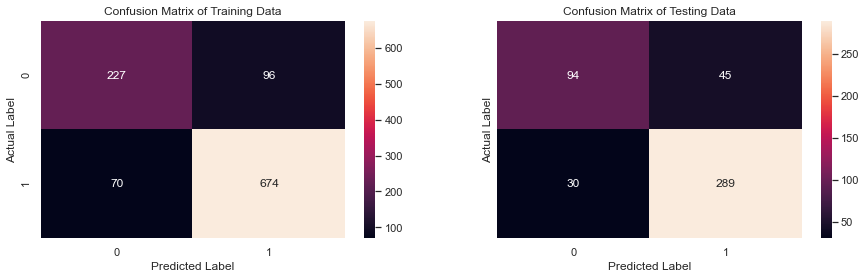

In [207]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,4))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");

# AUC and ROC for the training data & test data

AUC: 0.902


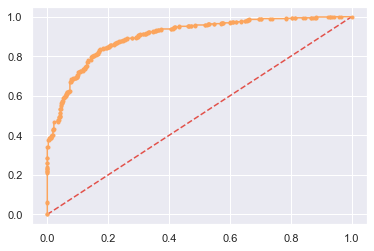

In [243]:
# predict probabilities
probs = Ada_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
ada_auc_train = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % ada_auc_train)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.906


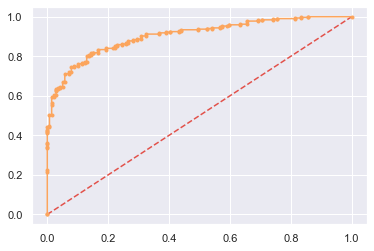

In [244]:
# predict probabilities
probs = Ada_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
ada_auc_test = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % ada_auc_test)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# ADA Boosting Metrics

In [210]:
ada_metrics_train=classification_report(Y_train, ytrain_predict,output_dict=True)
ada_metrics=pd.DataFrame(ada_metrics_train).transpose()
ada_train_f1=round(ada_metrics.loc["1"][2],2)
ada_train_recall=round(ada_metrics.loc["1"][1],2)
ada_train_precision=round(ada_metrics.loc["1"][0],2)
print ('ada_train_precision ',ada_train_precision)
print ('ada_train_recall ',ada_train_recall)
print ('ada_train_f1 ',ada_train_f1)

ada_train_precision  0.88
ada_train_recall  0.91
ada_train_f1  0.89


In [211]:
ada_metrics_test=classification_report(Y_test, ytest_predict,output_dict=True)
ada_metrics2=pd.DataFrame(ada_metrics_test).transpose()
ada_test_f1=round(ada_metrics2.loc["1"][2],2)
ada_test_recall=round(ada_metrics2.loc["1"][1],2)
ada_test_precision=round(ada_metrics2.loc["1"][0],2)
print ('ada_test_precision ',ada_test_precision)
print ('ada_test_recall ',ada_test_recall)
print ('ada_test_f1 ',ada_test_f1)

ada_test_precision  0.87
ada_test_recall  0.91
ada_test_f1  0.89


# Gradient Boosting

In [212]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, Y_train)

# Predicting on Training and Test dataset

In [213]:
ytrain_predict = gbcl.predict(X_train)
ytest_predict = gbcl.predict(X_test)

# Getting the Predicted Classes and Probs

In [214]:
ytest_predict_prob=gbcl.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.140307,0.859693
1,0.047820,0.952180
2,0.046331,0.953669
3,0.308987,0.691013
4,0.003377,0.996623


# Model Evaluation

In [215]:
# Accuracy - Training Data

gbcl_acc_train= gbcl.score(X_train, Y_train)
gbcl_acc_train

0.887535145267104

In [216]:
# Accuracy - Testing Data

gbcl_acc_test= gbcl.score(X_test, Y_test)
gbcl_acc_test

0.8384279475982532

# Training Data and Test Data Classification Report Comparison

In [217]:
print(classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       323
           1       0.90      0.94      0.92       744

    accuracy                           0.89      1067
   macro avg       0.88      0.85      0.86      1067
weighted avg       0.89      0.89      0.89      1067



In [218]:
print(classification_report(Y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71       139
           1       0.86      0.92      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.79      0.80       458
weighted avg       0.83      0.84      0.83       458



# Training Data and Test Data Confusion Matrix Comparison

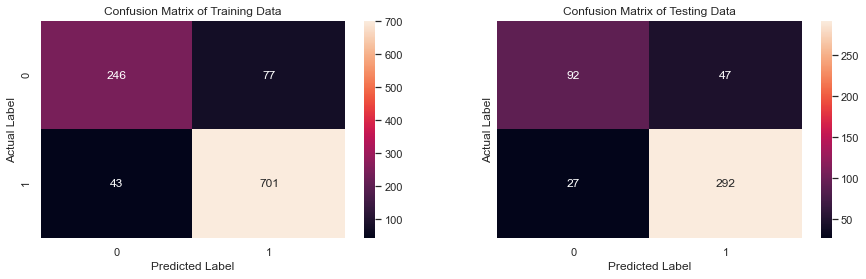

In [219]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,4))

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");

# AUC and ROC for the training data & test data

AUC: 0.948


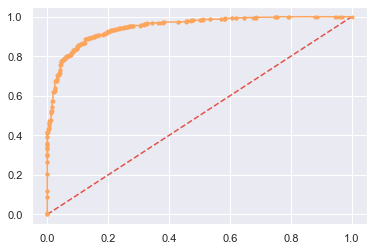

In [245]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
gbcl_auc_train = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % gbcl_auc_train)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.908


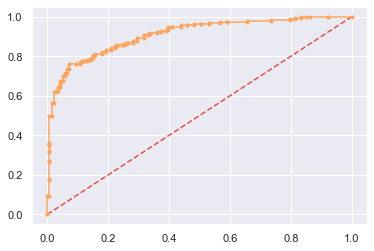

In [246]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
gbcl_auc_test = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % gbcl_auc_test)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Gradient Boosting Metrics

In [222]:
gbcl_metrics_train=classification_report(Y_train, ytrain_predict,output_dict=True)
gbcl_metrics=pd.DataFrame(gbcl_metrics_train).transpose()
gbcl_train_f1=round(gbcl_metrics.loc["1"][2],2)
gbcl_train_recall=round(gbcl_metrics.loc["1"][1],2)
gbcl_train_precision=round(gbcl_metrics.loc["1"][0],2)
print ('gbcl_train_precision ',gbcl_train_precision)
print ('gbcl_train_recall ',gbcl_train_recall)
print ('gbcl_train_f1 ',gbcl_train_f1)

gbcl_train_precision  0.9
gbcl_train_recall  0.94
gbcl_train_f1  0.92


In [223]:
gbcl_metrics_test=classification_report(Y_test, ytest_predict,output_dict=True)
gbcl_metrics2=pd.DataFrame(gbcl_metrics_test).transpose()
gbcl_test_f1=round(gbcl_metrics2.loc["1"][2],2)
gbcl_test_recall=round(gbcl_metrics2.loc["1"][1],2)
gbcl_test_precision=round(gbcl_metrics2.loc["1"][0],2)
print ('gbcl_test_precision ',gbcl_test_precision)
print ('gbcl_test_recall ',gbcl_test_recall)
print ('gbcl_test_f1 ',gbcl_test_f1)

gbcl_test_precision  0.86
gbcl_test_recall  0.92
gbcl_test_f1  0.89


# Comparison of all Models

In [247]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
df_lr_lda_NB_KNN_rfcl_bgcl_ada_gbcl = pd.DataFrame({'LR Train':[gridsearch_acc_train,gridsearch_auc_train,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[gridsearch_acc_test,gridsearch_auc_test,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train':[lda_acc_train,lda_auc_train,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_acc_test,lda_auc_test,lda_test_recall,lda_test_precision,lda_test_f1],
        'NB Train':[NB_acc_train,NB_auc_train,NB_train_recall,NB_train_precision,NB_train_f1],
        'NB Test':[NB_acc_test,NB_auc_test,NB_test_recall,NB_test_precision,NB_test_f1],
        'KNN Train':[KNN_acc_train,KNN_auc_train,KNN_train_recall,KNN_train_precision,KNN_train_f1],
        'KNN Test':[KNN_acc_test,KNN_auc_test,KNN_test_recall,KNN_test_precision,KNN_test_f1],
        'bgcl Train':[bgcl_acc_train,bgcl_auc_train,bgcl_train_recall,bgcl_train_precision,bgcl_train_f1],
        'bgcl Test':[bgcl_acc_test,bgcl_auc_test,bgcl_test_recall,bgcl_test_precision,bgcl_test_f1],
        'rfcl Train':[rfcl_acc_train,rfcl_auc_train,rfcl_train_recall,rfcl_train_precision,rfcl_train_f1],
        'rfcl Test':[rfcl_acc_test,rfcl_auc_test,rfcl_test_recall,rfcl_test_precision,rfcl_test_f1],
        'gbcl Train':[gbcl_acc_train,gbcl_auc_train,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1],
        'gbcl Test':[gbcl_acc_test,gbcl_auc_test,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1],
        'ada Train':[ada_acc_train,ada_auc_train,ada_train_recall,ada_train_precision,ada_train_f1],
        'ada Test':[ada_acc_test,ada_auc_test,ada_test_recall,ada_test_precision,ada_test_f1],},index=index)                                      
round(df_lr_lda_NB_KNN_rfcl_bgcl_ada_gbcl,2)

,LR Train,LR Test,LDA Train,LDA Test,NB Train,NB Test,KNN Train,KNN Test,bgcl Train,bgcl Test,rfcl Train,rfcl Test,gbcl Train,gbcl Test,ada Train,ada Test
Accuracy,0.83,0.85,0.83,0.84,0.82,0.85,0.84,0.86,1.0,0.83,0.82,0.83,0.89,0.84,0.84,0.84
AUC,0.88,0.92,0.88,0.91,0.87,0.91,0.91,0.89,1.0,0.89,0.89,0.90,0.95,0.91,0.90,0.91
Recall,0.91,0.93,0.90,0.91,0.88,0.90,0.91,0.92,1.0,0.90,0.93,0.94,0.94,0.92,0.91,0.91
Precision,0.86,0.87,0.86,0.87,0.87,0.88,0.87,0.89,1.0,0.86,0.83,0.83,0.90,0.86,0.88,0.87
F1 Score,0.88,0.90,0.88,0.89,0.87,0.89,0.89,0.90,1.0,0.88,0.88,0.89,0.92,0.89,0.89,0.89


* If we compare all models, Bagging model performed extremely well on training data. But if we compare training and test data both, there is a noticeable difference between performance of training and test data. It is over fitted model and is not reliable.

* KNN, logistic regression, Random forest, gradient boost and ada boost models have good recall rate. But if we compare all the metrics, KNN model has better accuracy, recall, precision and F1 scores. 

* Also KNN model has performed similar on both train and test data. Hence KNN model would best fit for this data. If we have to go for another model apart from KNN, we can choose random forest as next best model. 

* Random forest has high recall rate among all the models. Recall rate refers to the number actual true data points identified as true data points by the model. In this case, it would be the number of votes to labour party were predicted accurately by model.

# Insights and Recommendations for Business:

Inferences from above predictions and analysis of data have been mentioned below:

* 'Hague' and 'Blair' are the 2 most important features or variables that helps in predicting the target variable 'Vote'. The next 2 important features are 'Europe' and 'Political Knowledge'.

* 'Hague' belongs to conservative party and 'Blair' belongs to labour party. The average rating given by voters on the assessment of 'Labour' party leader 'Blair' is 3.33. Where as, the average rating given to Conservative party leader 'Hague' is 2.75.

* It means voters were more in favour of Labour party than conservative party.

* Even though, majority of them are females among the voters, 'Gender' has no significance or importance in predicting target variable.

* From the EDA, it appears that, voters above 80 years were more in favour of Labour party compared to Conservative.

* From the above data, it appears that 69% of the voters have chosen Labour party over conservative. 

* Majority of the voters gave 4 star rating to 'Blair'. Where as majority of voters gave 2 star rating 'Hague' which clearly shows voters were more in favour of Labour party leader.

* Majority of voters who gave rating 11(meaning Eurosceptic) for variable 'Europe' voted for conservative party. It means majority of the voters who oppose European integration have voted for conservative party.

* Majority of the voters gave rating 3 for the variable 'Economic_condition_national'. The voters who gave rating 3 and above voted for Labour party.